In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchaudio

In [2]:
# Loading the MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data/', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data/', train=False, transform=transforms.ToTensor(), download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=100, shuffle=False)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
# Defining AlexNet model
class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2)
        self.fc1 = nn.Linear(7 * 7 * 64, 1024)
        self.fc2 = nn.Linear(1024, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 7 * 7 * 64)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = AlexNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [4]:
# Training the model
for epoch in range(2):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Testing the model
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))


Accuracy of the model on the test images: 93.38 %


In [8]:
# Load an audio file
filename = "/content/8- Implementing the amplitude envelope_audio_debussy.wav"
waveform, sample_rate = torchaudio.load(filename)

# Short-Time Fourier Transform (STFT)
stft = torchaudio.transforms.Spectrogram(n_fft=1024, hop_length=512)(waveform)

# Mel Spectrogram
mel_spectrogram = torchaudio.transforms.MelSpectrogram(sample_rate=sample_rate, n_fft=1024, hop_length=512, n_mels=128)(waveform)

# Mel-Frequency Cepstral Coefficients (MFCC)
mfcc = torchaudio.transforms.MFCC(sample_rate=sample_rate, n_mfcc=13)(mel_spectrogram)

# Convert to tensors
stft = stft.squeeze().transpose(0, 1)
stft = stft.log2()
mel_spectrogram = mel_spectrogram.squeeze().transpose(0, 1)
mel_spectrogram = mel_spectrogram.log2()
mfcc = mfcc.squeeze().transpose(0, 1)



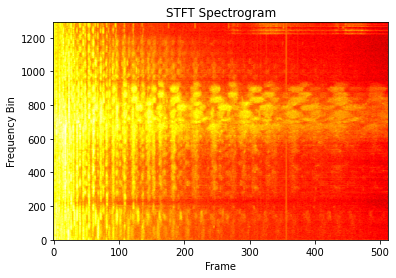

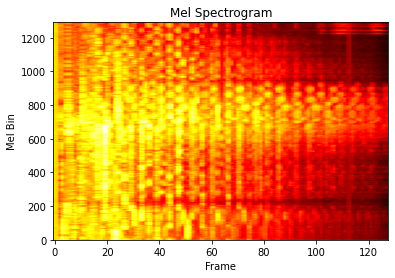

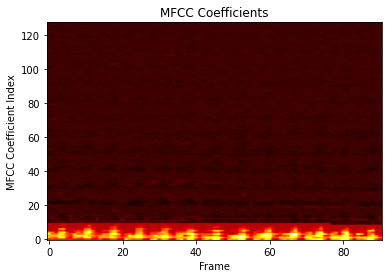

In [11]:
import matplotlib.pyplot as plt

# Plot the spectrogram of the STFT transformation
plt.imshow(stft.numpy(), cmap='hot', origin='lower', aspect='auto')
plt.title('STFT Spectrogram')
plt.xlabel('Frame')
plt.ylabel('Frequency Bin')
plt.show()

# Plot the spectrogram of the Mel Spectrogram transformation
plt.imshow(mel_spectrogram.numpy(), cmap='hot', origin='lower', aspect='auto')
plt.title('Mel Spectrogram')
plt.xlabel('Frame')
plt.ylabel('Mel Bin')
plt.show()

# Plot the MFCC coefficients

mfcc_2d = mfcc.reshape(128, 13 * 7)
plt.imshow(mfcc_2d, cmap='hot', origin='lower', aspect='auto')
plt.title('MFCC Coefficients')
plt.xlabel('Frame')
plt.ylabel('MFCC Coefficient Index')
plt.show()
